problem analysis: we mixed up the datasets of layla and rosanna for pressure. question remaining: where in calibration AWS? How to fix it? What are then the new calibration formulars?

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np
import pandas as pd
import os

import sys
sys.path.append("..")

from channeling_lib import AWS_file_loader, load_path

stations_str = ['Tom Joad','Rosanna','Bette Davis', 'Layla', 'Mrs Robinson']

In [40]:
path = load_path()+'RawData/AWS/'
instrument_textbook_name = load_path()+'instrument_textbook_BLcourse_spring2025(BL instruments).csv'

instrument_textbook_data = pd.read_csv(instrument_textbook_name, encoding='latin1')

# instrument_textbook_data['Maintenance duration (minutes)'] == 'Layla'

In [41]:
#station data raw
#layla all
raw_layla_20250130 = path + 'Layla/CR1000_Layla_Res_data_1_min_20240910_20250130_2025_01_30_09_54_45.dat'
raw_layla_20250203 = path + 'Layla/CR1000_Layla_Res_data_1_min_20240910_20250203_2025_02_03_11_19_37.dat'

#rosanna all
raw_rosanna_20250131 =  path + 'Rosanna/CR200_Rosanna_Res_data_1_min_20240910_20250131_2025_01_31_11_09_07.dat'
raw_rosanna_20250203 =  path + 'Rosanna/CR200_Rosanna_Res_data_1_min_20240910_20250203_2025_02_03_09_23_11.dat'

#mrs robinson all
raw_mrsrobinson_20250131 =  path + 'Mrs Robinson/CR200_MrsRobinson_Res_data_1_min_20240910_20250131_2025_01_31_16_10_22.dat'
raw_mrsrobinson_20250203 =  path + 'Mrs Robinson/CR200_MrsRobinson_Res_data_1_min_20240910_20250203_2025_02_03_10_44_29.dat'

#bette davis all
raw_bettedavis_20250131 =  path + 'Bette Davis/CR200_BetteDavis_Res_data_1_min_20240910_20250131_2025_01_31_13_20_02.dat'
raw_bettedavis_20250203 =  path + 'Bette Davis/CR200_BetteDavis_Res_data_1_min_20240910_20250203_2025_02_03_10_00_51.dat'

#Tom joad all
raw_tomjoad_20250130 =  path + 'Tom Joad/CR1000_TomJoad_Res_data_1_min_20240910_20250130_2025_01_30_11_01_43.dat'
raw_tomjoad_20250203 =  path + 'Tom Joad/CR1000_TomJoad_Res_data_1_min_20240910_20250203_2025_02_03_13_46_13.dat'

In [42]:
manual_times = {}


stations_str = ['Rosanna','Layla']
for station in stations_str:
    setup_time_idx = pd.to_datetime(instrument_textbook_data.loc[instrument_textbook_data['Station name'] == station, 'Setup time (UTC)'].values[0])

    maintenance_start_time_idx = pd.to_datetime(instrument_textbook_data.loc[instrument_textbook_data['Station name'] == station, 'Maintenance start time (UTC)'].values[0])

    maintenance_duration_idx = int(instrument_textbook_data.loc[instrument_textbook_data['Station name'] == station, 'Maintenance duration (minutes)'].values[0])

    retrieval_time_idx = pd.to_datetime(instrument_textbook_data.loc[instrument_textbook_data['Station name'] == station, 'Retrieval time (UTC)'].values[0])

    manual_times[station] = {
            'setup_time': setup_time_idx,
            'maintenance_start_time': maintenance_start_time_idx,
            'maintenance_duration': maintenance_duration_idx,
            'retrieval_time': retrieval_time_idx
        }

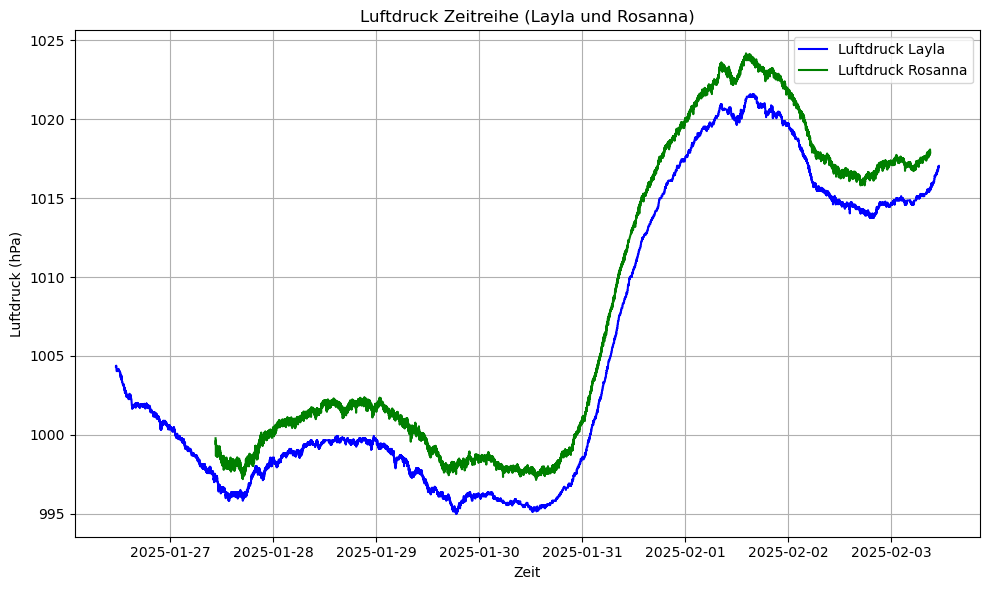

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(layla_all_filtered.index, layla_all_filtered['air_pressure'], label='Luftdruck Layla', color='blue')

# Plot der Zeitreihe für die Station Rosanna
plt.plot(rosanna_all_filtered.index, rosanna_all_filtered['air_pressure'], label='Luftdruck Rosanna', color='green')

# Diagramm beschriften
plt.title('Luftdruck Zeitreihe (Layla und Rosanna)')
plt.xlabel('Zeit')
plt.ylabel('Luftdruck (hPa)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

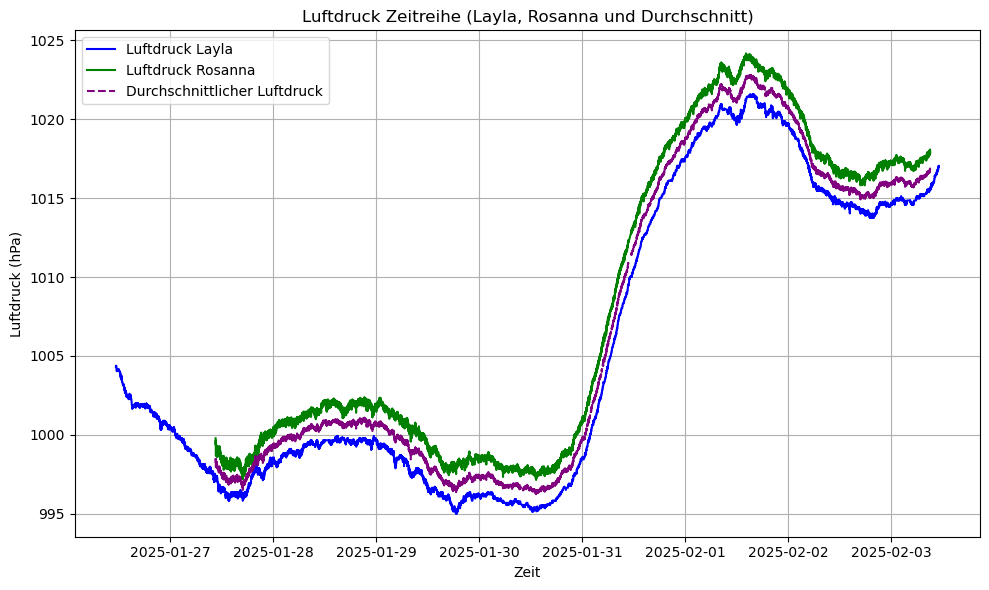

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Berechnung des Mittelwerts des Luftdrucks für jeden Zeitstempel
df_avg_pressure = pd.DataFrame({
    'average_pressure': (layla_all_filtered['air_pressure'] + rosanna_all_filtered['air_pressure']) / 2
}, index=layla_all_filtered.index)

# Plotten der Luftdruck-Zeitreihen
plt.figure(figsize=(10, 6))

# Plot für Layla
plt.plot(layla_all_filtered.index, layla_all_filtered['air_pressure'], label='Luftdruck Layla', color='blue')

# Plot für Rosanna
plt.plot(rosanna_all_filtered.index, rosanna_all_filtered['air_pressure'], label='Luftdruck Rosanna', color='green')

# Plot der Mittelwert-Kurve
plt.plot(df_avg_pressure.index, df_avg_pressure['average_pressure'], label='Durchschnittlicher Luftdruck', color='purple', linestyle='--')

# Diagramm beschriften
plt.title('Luftdruck Zeitreihe (Layla, Rosanna und Durchschnitt)')
plt.xlabel('Zeit')
plt.ylabel('Luftdruck (hPa)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Speichern des Mittelwerts in einem DataFrame
df_avg_pressure.to_csv('durchschnittlicher_luftdruck.csv', index=True)


In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Berechnung der mittleren Luftdruckwerte
df_avg_pressure = pd.DataFrame({
    'average_pressure': (layla_all_filtered['air_pressure'] + rosanna_all_filtered['air_pressure']) / 2
}, index=layla_all_filtered.index)

# Scatterplot der Luftdruckdaten von Layla (Y) und der gemittelten Kurve (X)
plt.figure(figsize=(10, 6))

# Scatterplot erstellen
plt.scatter(df_avg_pressure['average_pressure'], layla_all_filtered['air_pressure'], color='blue', label='Datenpunkte', alpha=0.6)

# Lineare Regression
X = df_avg_pressure['average_pressure'].values.reshape(-1, 1)  # X-Achse (Durchschnittswerte)
y = layla_all_filtered['air_pressure'].values  # Y-Achse (Luftdruck von Layla)

# Regressionsmodell anpassen
regression_model = LinearRegression()
regression_model.fit(X, y)

# Vorhersage der Y-Werte
y_pred = regression_model.predict(X)

# Regressionsgerade plotten
plt.plot(df_avg_pressure['average_pressure'], y_pred, color='red', label=f'Regressionslinie (y = {regression_model.intercept_:.2f} + {regression_model.coef_[0]:.2f}x)')

# Berechnung von R^2
r_squared = regression_model.score(X, y)

# Diagramm formatieren
plt.title('Scatterplot: Luftdruck von Layla vs. Durchschnittlicher Luftdruck mit Regression')
plt.xlabel('Durchschnittlicher Luftdruck (hPa)')
plt.ylabel('Luftdruck Layla (hPa)')
plt.legend()
plt.grid(True)

# Regressionsgleichung und R^2 im Diagramm einfügen
plt.text(0.05, 0.95, f'$\it{{y}} = {regression_model.intercept_:.2f} + {regression_model.coef_[0]:.2f}x$', transform=plt.gca().transAxes, fontsize=12, color='red')
plt.text(0.05, 0.90, f'$R^2 = {r_squared:.2f}$', transform=plt.gca().transAxes, fontsize=12, color='red')

# Diagramm anzeigen
plt.tight_layout()
plt.show()


<>:42: SyntaxWarning: invalid escape sequence '\i'
<>:42: SyntaxWarning: invalid escape sequence '\i'
C:\Users\Paula\AppData\Local\Temp\ipykernel_3132\100629319.py:42: SyntaxWarning: invalid escape sequence '\i'
  plt.text(0.05, 0.95, f'$\it{{y}} = {regression_model.intercept_:.2f} + {regression_model.coef_[0]:.2f}x$', transform=plt.gca().transAxes, fontsize=12, color='red')


AttributeError: module 'matplotlib.cm' has no attribute 'register_cmap'

In [44]:
def filter_data_based_on_time(df, setup_time, maintenance_start_time, maintenance_duration, retrieval_time, is_second_file=False):
    """
    Filtert die Daten basierend auf den angegebenen Zeitbereichen für das 1. und 2. Dataset.
    
    :param df: Der DataFrame mit den Rohdaten.
    :param setup_time: Der Setup-Zeitpunkt in UTC (als pd.Timestamp).
    :param maintenance_start_time: Der Startzeitpunkt der Wartung in UTC (als pd.Timestamp).
    :param maintenance_duration: Die Dauer der Wartung in Minuten.
    :param retrieval_time: Der Retrieval-Zeitpunkt in UTC (als pd.Timestamp).
    :param is_second_file: True, wenn es sich um das 2. Dataset handelt, andernfalls False für das 1. Dataset.
    :return: Der gefilterte DataFrame.
    """
    if is_second_file:
        # Filter für das 2. Dataset: nach Maintenance start time + duration + 5 Minuten und Retrieval time - 5 Minuten
        start_time = maintenance_start_time + pd.Timedelta(minutes=int(maintenance_duration))
        end_time = retrieval_time
    else:
        # Filter für das 1. Dataset: nach Setup time + 5 Minuten und Maintenance start time - 5 Minuten
        start_time = setup_time
        end_time = maintenance_start_time

    # Filter die Daten innerhalb des angegebenen Zeitrahmens
    filtered_df = df[(df.index >= start_time) & (df.index <= end_time)]
    return filtered_df


In [46]:
# Layla - File 1 und File 2
raw_data_1_layla = AWS_file_loader(raw_layla_20250130)
raw_data_2_layla = AWS_file_loader(raw_layla_20250203)
layla_times = manual_times["Layla"]
filtered_data_1_layla = filter_data_based_on_time(
    raw_data_1_layla, 
    layla_times["setup_time"], 
    layla_times["maintenance_start_time"], 
    layla_times["maintenance_duration"], 
    layla_times["retrieval_time"], 
    is_second_file=False
)
filtered_data_2_layla = filter_data_based_on_time(
    raw_data_2_layla, 
    layla_times["setup_time"], 
    layla_times["maintenance_start_time"], 
    layla_times["maintenance_duration"], 
    layla_times["retrieval_time"], 
    is_second_file=True
)

# Rosanna - File 1 und File 2
raw_data_1_rosanna = AWS_file_loader(raw_rosanna_20250131)
raw_data_2_rosanna = AWS_file_loader(raw_rosanna_20250203)
rosanna_times = manual_times["Rosanna"]
filtered_data_1_rosanna = filter_data_based_on_time(
    raw_data_1_rosanna, 
    rosanna_times["setup_time"], 
    rosanna_times["maintenance_start_time"], 
    rosanna_times["maintenance_duration"], 
    rosanna_times["retrieval_time"], 
    is_second_file=False
)
filtered_data_2_rosanna = filter_data_based_on_time(
    raw_data_2_rosanna, 
    rosanna_times["setup_time"], 
    rosanna_times["maintenance_start_time"], 
    rosanna_times["maintenance_duration"], 
    rosanna_times["retrieval_time"], 
    is_second_file=True
)

# # Mrs Robinson - File 1 und File 2
# raw_data_1_mrsrobinson = AWS_file_loader(raw_mrsrobinson_20250131)
# raw_data_2_mrsrobinson = AWS_file_loader(raw_mrsrobinson_20250203)
# mrsrobinson_times = manual_times["Mrs Robinson"]
# filtered_data_1_mrsrobinson = filter_data_based_on_time(
#     raw_data_1_mrsrobinson, 
#     mrsrobinson_times["setup_time"], 
#     mrsrobinson_times["maintenance_start_time"], 
#     mrsrobinson_times["maintenance_duration"], 
#     mrsrobinson_times["retrieval_time"], 
#     is_second_file=False
# )
# filtered_data_2_mrsrobinson = filter_data_based_on_time(
#     raw_data_2_mrsrobinson, 
#     mrsrobinson_times["setup_time"], 
#     mrsrobinson_times["maintenance_start_time"], 
#     mrsrobinson_times["maintenance_duration"], 
#     mrsrobinson_times["retrieval_time"], 
#     is_second_file=True
# )

# # Bette Davis - File 1 und File 2
# raw_data_1_bettedavis = AWS_file_loader(raw_bettedavis_20250131)
# raw_data_2_bettedavis = AWS_file_loader(raw_bettedavis_20250203)
# bettedavis_times = manual_times["Bette Davis"]
# filtered_data_1_bettedavis = filter_data_based_on_time(
#     raw_data_1_bettedavis, 
#     bettedavis_times["setup_time"], 
#     bettedavis_times["maintenance_start_time"], 
#     bettedavis_times["maintenance_duration"], 
#     bettedavis_times["retrieval_time"], 
#     is_second_file=False
# )
# filtered_data_2_bettedavis = filter_data_based_on_time(
#     raw_data_2_bettedavis, 
#     bettedavis_times["setup_time"], 
#     bettedavis_times["maintenance_start_time"], 
#     bettedavis_times["maintenance_duration"], 
#     bettedavis_times["retrieval_time"], 
#     is_second_file=True
# )

# # Tom Joad - File 1 und File 2
# raw_data_1_tomjoad = AWS_file_loader(raw_tomjoad_20250130)
# raw_data_2_tomjoad = AWS_file_loader(raw_tomjoad_20250203)
# tomjoad_times = manual_times["Tom Joad"]
# filtered_data_1_tomjoad = filter_data_based_on_time(
#     raw_data_1_tomjoad, 
#     tomjoad_times["setup_time"], 
#     tomjoad_times["maintenance_start_time"], 
#     tomjoad_times["maintenance_duration"], 
#     tomjoad_times["retrieval_time"], 
#     is_second_file=False
# )
# filtered_data_2_tomjoad = filter_data_based_on_time(
#     raw_data_2_tomjoad, 
#     tomjoad_times["setup_time"], 
#     tomjoad_times["maintenance_start_time"], 
#     tomjoad_times["maintenance_duration"], 
#     tomjoad_times["retrieval_time"], 
#     is_second_file=True
#)

# Ausgabe der Ergebnisse
# print("Gefilterte Daten für Layla (File 1):")
# print(filtered_data_1_layla.head())
# print(f"Startdatum: {filtered_data_1_layla.index.min()} | Enddatum: {filtered_data_1_layla.index.max()}")

# print("Gefilterte Daten für Layla (File 2):")
# print(filtered_data_2_layla.head())
# print(f"Startdatum: {filtered_data_2_layla.index.min()} | Enddatum: {filtered_data_2_layla.index.max()}")
# Wiederhole dies für die anderen Stationen (Rosanna, Mrs Robinson, etc.)
#filtered_data_2_layla

c:\Users\Paula\anaconda3\envs\Boundary_Layer\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
c:\Users\Paula\anaconda3\envs\Boundary_Layer\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
c:\Users\Paula\anaconda3\envs\Boundary_Layer\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_object

In [47]:
layla_all_filtered = pd.concat((filtered_data_1_layla, filtered_data_2_layla))
rosanna_all_filtered = pd.concat((filtered_data_1_rosanna, filtered_data_2_rosanna))

In [49]:
# #pressure
# def calibrate_air_pressure_layla(air_pressure):
#     if np.isnan(air_pressure):  # Überprüfen, ob der Wert NaN ist
#         return np.nan
#     calibrated_air_pressure = air_pressure * 0.99 + 6.04
#     return max(calibrated_air_pressure, 0)  # Falls der Wert negativ ist, setze ihn auf 0

# def calibrate_air_pressure_rosanna(air_pressure):
#     if np.isnan(air_pressure):  # Überprüfen, ob der Wert NaN ist
#         return np.nan
#     calibrated_air_pressure = air_pressure * 1.01 - 6.04
#     return max(calibrated_air_pressure, 0)

#pressure
def calibrate_air_pressure_layla(air_pressure):
    if np.isnan(air_pressure):  # Überprüfen, ob der Wert NaN ist
        return np.nan
    calibrated_air_pressure = air_pressure * 1.01 - 6.04
    return max(calibrated_air_pressure, 0)  # Falls der Wert negativ ist, setze ihn auf 0

def calibrate_air_pressure_rosanna(air_pressure):
    if np.isnan(air_pressure):  # Überprüfen, ob der Wert NaN ist
        return np.nan
    calibrated_air_pressure = air_pressure * 0.99 + 6.04
    return max(calibrated_air_pressure, 0)

In [50]:
# apply calibration pressure
layla_all_filtered['calibrated_air_pressure'] = layla_all_filtered['air_pressure'].apply(calibrate_air_pressure_layla)
rosanna_all_filtered['calibrated_air_pressure'] = rosanna_all_filtered['air_pressure'].apply(calibrate_air_pressure_rosanna)

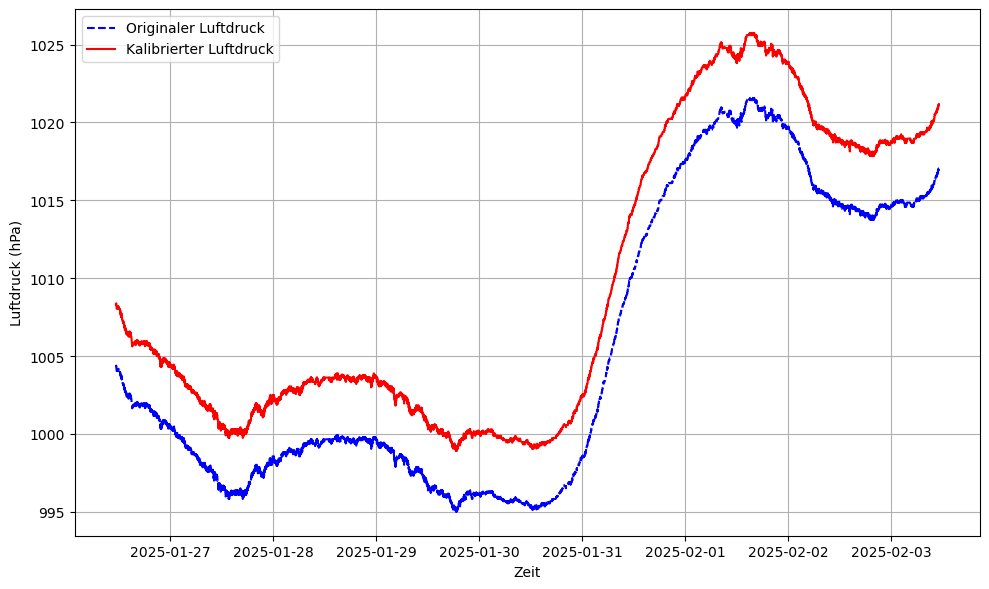

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(layla_all_filtered.index, layla_all_filtered['air_pressure'], label='Originaler Luftdruck', color='blue', linestyle='--')
plt.plot(layla_all_filtered.index, layla_all_filtered['calibrated_air_pressure'], label='Kalibrierter Luftdruck', color='red', linestyle='-')

# Diagramm beschriften
#plt.title('Luftdruck und Kalibrierter Luftdruck über die Zeit (Layla)')
plt.xlabel('Zeit')
plt.ylabel('Luftdruck (hPa)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

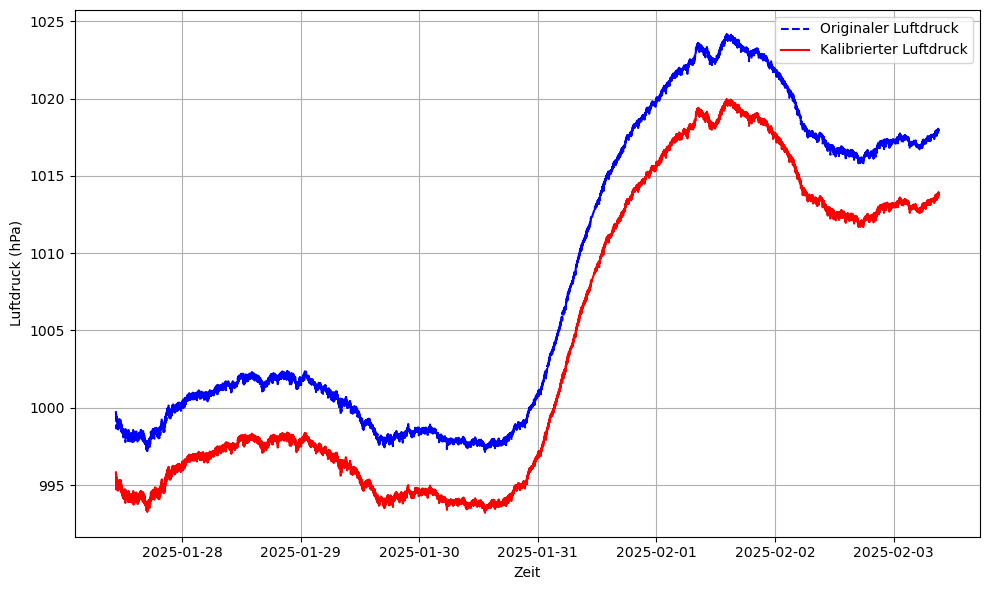

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(rosanna_all_filtered.index, rosanna_all_filtered['air_pressure'], label='Originaler Luftdruck', color='blue', linestyle='--')
plt.plot(rosanna_all_filtered.index, rosanna_all_filtered['calibrated_air_pressure'], label='Kalibrierter Luftdruck', color='red', linestyle='-')

# Diagramm beschriften
#plt.title('Luftdruck und Kalibrierter Luftdruck über die Zeit (Layla)')
plt.xlabel('Zeit')
plt.ylabel('Luftdruck (hPa)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

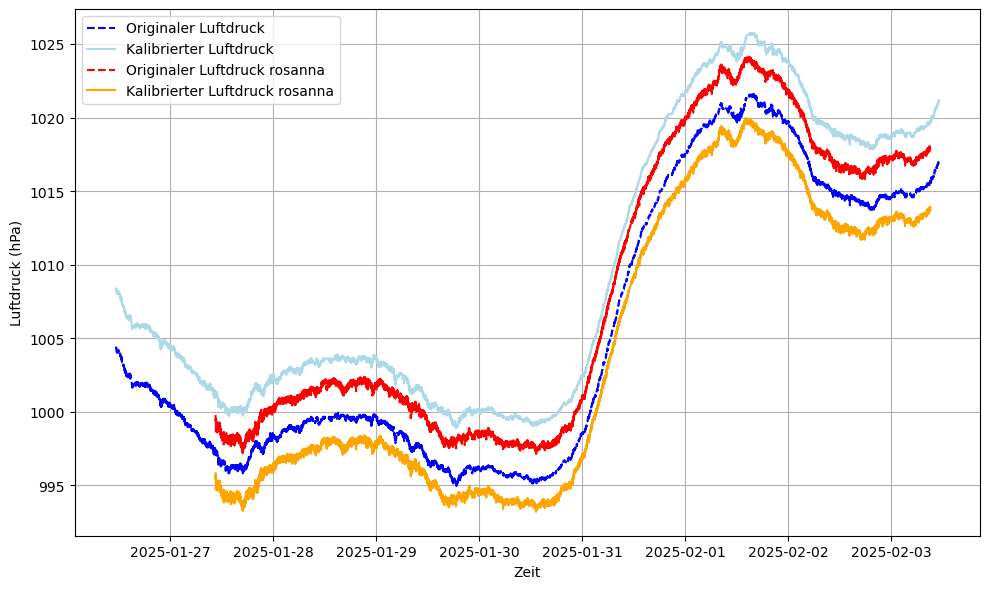

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(layla_all_filtered.index, layla_all_filtered['air_pressure'], label='Originaler Luftdruck', color='blue', linestyle='--')
plt.plot(layla_all_filtered.index, layla_all_filtered['calibrated_air_pressure'], label='Kalibrierter Luftdruck', color='lightblue', linestyle='-')
plt.plot(rosanna_all_filtered.index, rosanna_all_filtered['air_pressure'], label='Originaler Luftdruck rosanna', color='red', linestyle='--')
plt.plot(rosanna_all_filtered.index, rosanna_all_filtered['calibrated_air_pressure'], label='Kalibrierter Luftdruck rosanna', color='orange', linestyle='-')

# Diagramm beschriften
#plt.title('Luftdruck und Kalibrierter Luftdruck über die Zeit (Layla)')
plt.xlabel('Zeit')
plt.ylabel('Luftdruck (hPa)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()